In [1]:
from QAOA import QAOArunner
from MaxCutProblem import MaxCutProblem
import params
from rustworkx.visualization import mpl_draw as draw_graph
from load_data import load_graph_from_csv

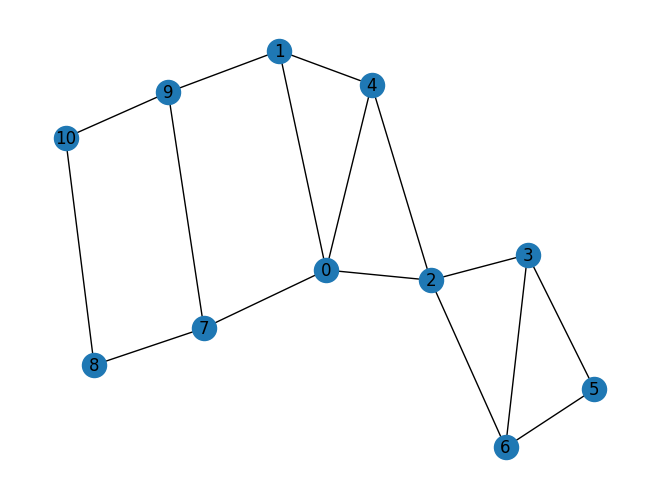

In [2]:
problem = MaxCutProblem()
graph = problem.get_graph(6, create_random=True,random_weights=False)
graph = load_graph_from_csv('data/11_nodes_links_scand.csv')
draw_graph(graph, with_labels=True)

In [ ]:
import warnings

quantum = QAOArunner(graph=graph, 
                     simulation=True,
                     param_initialization= 'gaussian',
                     qaoa_variant='normal', 
                     optimizer='COBYLA',
                     warm_start=True,
                     test_hamil = True,
                     restrictions = False
                     )

quantum.build_circuit()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    quantum.run()
quantum.draw_circuit()
#TODO: account for random weigts?

Num qubits:  11
<IBMBackend('ibm_brisbane')>
type circuit <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
Init_params, for error checking: [ 0.4472714   0.51214247  2.08191897  1.1604562  -0.87722532  5.24271522
  0.70706746  2.80075715 -1.29746402  1.26958426]


RuntimeInvalidStateError: 'Unable to retrieve result for job cx0ayybrkac00081fehg. Job was cancelled.'

In [ ]:
from solver import Solver


solver = Solver(graph)
quantum.compare_solutions(solver.solve())

Result quantum [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0] Objective value:  9
Result input (classical) [1.0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 0] Objective Value:  12.0
Same solution False
Same objective function value:  False


In [ ]:
quantum.get_prob_distribution()

{1746: 16, 234: 39, 1753: 55, 1436: 13, 1230: 18, 1314: 3, 1498: 77, 1766: 26, 226: 52, 730: 355, 1778: 27, 1696: 3, 1789: 10, 1581: 1, 222: 88, 1754: 287, 1174: 10, 746: 59, 1266: 20, 1816: 13, 88: 11, 603: 33, 639: 2, 641: 2, 604: 2, 217: 50, 218: 287, 1246: 91, 1794: 11, 1244: 154, 422: 3, 1209: 3, 374: 2, 475: 20, 474: 103, 795: 18, 1051: 7, 1736: 10, 276: 3, 1190: 11, 1500: 17, 158: 36, 1698: 14, 1242: 192, 1757: 34, 607: 7, 242: 30, 1776: 4, 284: 10, 732: 58, 1371: 3, 754: 40, 710: 2, 1738: 35, 738: 96, 1219: 7, 1530: 9, 1278: 8, 762: 93, 1218: 70, 587: 13, 188: 9, 1178: 49, 1123: 7, 410: 35, 763: 8, 698: 32, 708: 17, 1112: 19, 522: 18, 216: 50, 858: 13, 1626: 42, 665: 5, 220: 112, 986: 75, 1756: 87, 1506: 8, 1730: 72, 1624: 8, 2010: 55, 385: 4, 1337: 3, 1240: 66, 978: 5, 1114: 23, 89: 3, 506: 14, 1148: 1, 146: 6, 1762: 59, 1226: 14, 2013: 2, 154: 35, 8: 2, 1786: 60, 1054: 20, 1487: 2, 1850: 12, 1818: 46, 1522: 2, 1686: 11, 468: 3, 476: 31, 1065: 2, 409: 9, 1306: 37, 1216: 8, 924

c:\Users\torbjsme\Master\QAOA\myenv\lib\site-packages\qiskit\providers\fake_provider\generic_backend_v2.py:963: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


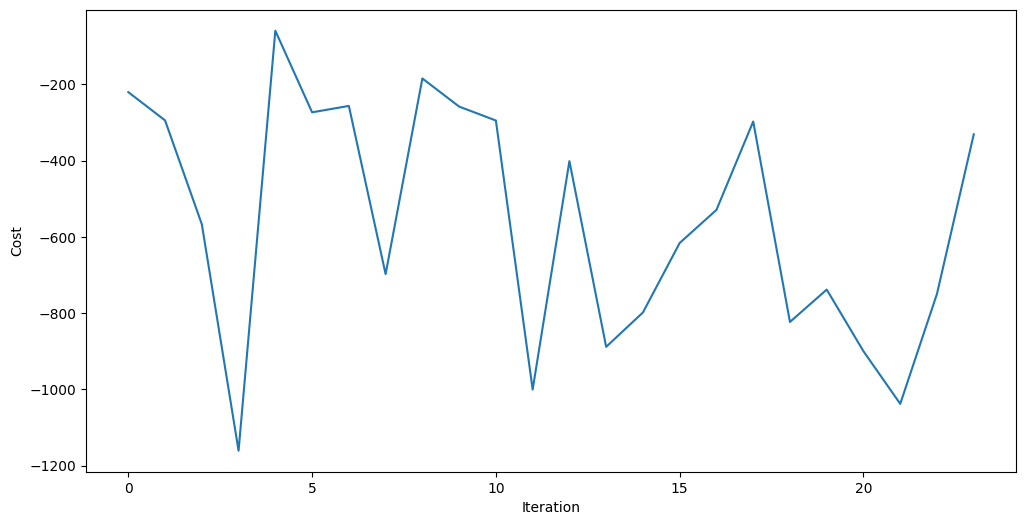

In [ ]:
quantum.draw_objective_value()

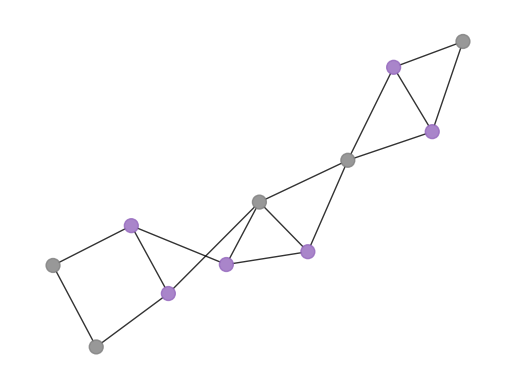

In [ ]:
quantum.plot_result()

In [ ]:
import csv

import numpy as np
import rustworkx as rx
from rustworkx import is_connected
from rustworkx.visualization import mpl_draw as draw_graph
import pandas as pd
import geopandas as gpd
import cartopy.feature as cfeature

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

def load_edges_verbose(file_path):
    df = pd.read_csv(file_path,delimiter=';',index_col=0)
    result = [(row, col, 1) for (row, col), value in df.stack().items() if value == 1]
    return result


def draw_nodes_on_cartopy(file_path, bitstring=None):
    
    df = pd.read_csv(file_path, delimiter=';')
    edges = load_edges_verbose('data/11_nodes_links_scand.csv')
    
    # Rename the first column
    df.rename(columns={df.columns[0]: 'name'}, inplace=True)
    # Set up a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['y'], df['x']))

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    # Add map features
    ax.set_extent([4, 25, 54, 72], crs=ccrs.PlateCarree())  # Set the extent to cover Norway, Denmark, Sweden
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')
    ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='black')
    ax.add_feature(cfeature.RIVERS, edgecolor='blue')
    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
  
    # Plot nodes on the map
    
    
    for start_label, end_label, weight in edges:
        start_coords = (df[df['name']==start_label]['y'], df[df['name']==start_label]['x'])
        end_coords = (df[df['name']==end_label]['y'], df[df['name']==end_label]['x'])
        ax.plot(
            [start_coords[0], end_coords[0]],  # x-coordinates (longitudes)
            [start_coords[1], end_coords[1]],  # y-coordinates (latitudes)
            color='black', linewidth=1 + weight, transform=ccrs.PlateCarree(), zorder=1
        )
    if bitstring is not None:
        colors = ['red' if bit == 1 else 'blue' for bit in bitstring]
    else:
        colors = 'red'
    
    gdf.plot(ax=ax, color=colors, markersize=50, transform=ccrs.PlateCarree(), edgecolor='black', label='Node')

    for idx, row in gdf.iterrows():
        ax.text(row.geometry.x + 0.005, row.geometry.y, row['name'], transform=ccrs.PlateCarree(),
                ha='left', fontsize=10, color='darkred', fontweight='bold')

    
    plt.legend()
    plt.title("Nodes on Norway, Denmark, and Sweden")
    plt.show()
#draw_nodes_on_cartopy('data/11_nodes_coords_scand.csv', bitstring=quantum.solution)



